# Configuration 



Dataset available on kaggle : https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [1]:
"""Importing torch library : PyTorch is an open-source ML library used for various tasks such as deep learning, neural networks, 
and tensor computations. It provides a flexible platform for training and learning models"""

import torch 

"""Numpy is for scientific computing with python. It provides support for large, multi-dimensional arrays and matrices, along
with mathematical functions to operate on these arrays"""

import numpy as np 

"""Matplotlib is a 2D plotting library. It allows you to create static, animated, and interactive visualizations in python"""

import matplotlib.pyplot as plt 

"""The os module provides a way of using operating system-dependent functionality, such as reading or writing to the file 
systems, interacting with command line etc"""

import os 

"""TQDM is a fast, extensible progress bar module for python and cli. It provides a visual indication of the progress
of an iterable's execution. example: adding progress bars to loops, monitoring the progress of data processing tasks."""

from tqdm.notebook import tqdm 

In [31]:
class CFG:
    
    epochs = 1                                         # No. of epochs of training the model 
    lr = 0.001                                         # Learning rate 
    batch_size = 16                                    # Batch Size For Dataset 
    
    model_name = 'tf_efficientnet_b4_ns'               # Model name (We are going to import model from timm)
    img_size = 224
    
    # Going to be use for loading dataset 
    DATA_DIR = "chest_xray_data"                       # Data Directory 
    TEST = 'test'                                      # Test folder name in data directory 
    TRAIN = 'train'                                    # Train folder name in data directory 
    VAL ='val'                                         # Valid folder name in data directory 
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
print("On which device we are on : {}".format(device))

On which device we are on : cpu


# Image Transformation and Load Dataset 

In [3]:
""" TorchVision is a library within PyTorch for image and video processing, it contains a number of important and useful 
data sets, model architecture, as well as models and transformation operations that are commonly used for computer 
vision projects."""
"""transforms module within torchvision provides a set of common image transformations that can be applied to 
images or datasets. Aliasing it as T makes it easier to use."""
""" Transformations include resizing, cropping, flipping, normalization, etc. These transformations are often applied to images 
before training a neural network."""
"""Torchvision provides many built-in datasets in the torchvision.datasets module, as well as utility classes for building your 
own datasets."""
from torchvision import transforms as T, datasets

#show_image is a custom function defined in  file helper

#from helper import show_image

In [4]:
def show_image(image,label,get_denormalize = True):
    
    image = image.permute(1,2,0)
    mean = torch.FloatTensor([0.485, 0.456, 0.406])
    std = torch.FloatTensor([0.229, 0.224, 0.225])
    
    if get_denormalize == True:
        image = image*std + mean
        image = np.clip(image,0,1)
        plt.imshow(image)
        plt.title(label)
        
    else: 
        plt.imshow(image)
        plt.title(label)

Below code defines three different data transformations using the torchvision.transforms module in PyTorch. These transformations are commonly used in the context of image data preprocessing for machine learning tasks, especially in the training, validation, and testing phases.
Resize: Resizes the input image to the spcified size
Random Rotation : Applies a random rotation to the image, within the specified degree range. This is the form of data augmentation which helps the model generalize better by exposing it to slighly rotated versions of training images.
T.ToTensor : Converts the image data to pytorch tensor format. This is necessary for feeding the images to neural network.
T.Normalize : Normalizes the image tensor with mean and standard deviation values. This is a common practice to scale the pixel values of the image, which can help in improving the training process.

T.Compose function is used to chain these transformations together into a single transformation pipeline.

During training, introducing random rotations helps the model become more robust by exposing it to various orientations of the input images.
However, during evaluation (on validation and test datasets), you want to assess the model's ability to recognize objects without the influence of random transformations. This ensures that the model is tested on the original, unaltered data to provide a fair evaluation of its generalization performance.

In [5]:
train_transform = T.Compose([
    T.Resize(size = (CFG.img_size,CFG.img_size)),
    T.RandomRotation(degrees=(-20,+20)),         
    T.ToTensor(), #(h,w,c)  ->  (c,h,w)
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

valid_transform = T.Compose([
    T.Resize(size = (CFG.img_size,CFG.img_size)),
    T.ToTensor(), #(h,w,c)  ->  (c,h,w)
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])


test_transform = T.Compose([
    T.Resize(size = (CFG.img_size,CFG.img_size)),
    T.ToTensor(), #(h,w,c)  ->  (c,h,w)
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])            

The mean and standard deviation values used for normalizing images in the ImageNet dataset are as follows:

Mean: [0.485, 0.456, 0.406]
Standard Deviation: [0.229, 0.224, 0.225]
These values are commonly used for preprocessing images in deep learning models trained on the ImageNet dataset. The purpose of normalization is to scale the pixel values of the images so that they have a zero mean and a standard deviation of 1. This helps the model converge faster during training and improves its generalization performance.

The os.path.join is a method in the "os.path" module in python that is used to join one or more path components intelligently. It takes care of proper handling of path separators to create a valid path string. 
So CFG.DATA_DIR is directory and CFG.TRAIN is subdirectory

The assignment of 0 for "Normal" and 1 for "Pneumonia" is determined by the order in which the classes (subdirectories) are encountered and processed by the ImageFolder class during its initialization.

The datasets.ImageFolder class, provided by PyTorch's torchvision library, is designed for loading image datasets where images are organized in a folder structure. Each subdirectory within the specified directory (train_path in this case) corresponds to a different class or category, and the images within those subdirectories are considered instances of that class.

When you create the trainset using datasets.ImageFolder(train_path, transform=train_transform), PyTorch's ImageFolder class scans the subdirectories in the specified train_path. It assigns class indices based on the order in which it encounters the subdirectories. The first subdirectory it encounters is assigned a label of 0, the second subdirectory is assigned a label of 1, and so on.


In [9]:
train_path = os.path.join(CFG.DATA_DIR,CFG.TRAIN)
valid_path = os.path.join(CFG.DATA_DIR,CFG.VAL)
test_path = os.path.join(CFG.DATA_DIR,CFG.TEST)

trainset = datasets.ImageFolder(train_path,transform = train_transform)
validset = datasets.ImageFolder(valid_path,transform = valid_transform)
testset = datasets.ImageFolder(test_path,transform = test_transform)

In [12]:
print("Trainset Size : {}".format(len(trainset)))
print("Validset Size : {}".format(len(validset)))
print("Testset Size : {}".format(len(testset)))

Trainset Size : 5216
Validset Size : 16
Testset Size : 624


 The trainset[2] object is a tuple containing two components: The first component of the tuple contains the image data. This is the actual image that the trainset is representing.
 The second component of the tuple contains the label associated with that image. The label is an integer that represents the class to which the image belongs. The mapping between the label and the actual class is determined by the order in which classes are encountered during the initialization of the ImageFolder instance.
 
The T.RandomRotation transformation is designed to apply a random rotation to the input image within the specified degree range each time the image is accessed. This randomness is intended to augment the training dataset and increase the model's robustness by exposing it to variations in the input data.

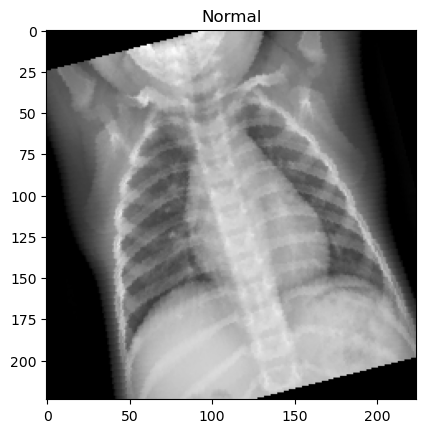

In [24]:
image,label = trainset[2]
class_name=["Normal","Pneomonia"]
show_image(image,class_name[label])

# Load Dataset into Batches 

In [42]:
"""This line imports the DataLoader class from PyTorch's torch.utils.data module. DataLoader is a PyTorch utility that provides 
an efficient way to load and iterate over batches of data from a given dataset during the training or evaluation process"""
from torch.utils.data import DataLoader 
"""This line imports the make_grid function from the torchvision.utils module. The make_grid function is typically used to 
create a grid of images from a batch of images, making it easier to visualize multiple images together."""
from torchvision.utils import make_grid


In [43]:
def show_grid(image,title = None):
    
    image = image.permute(1,2,0)
    mean = torch.FloatTensor([0.485, 0.456, 0.406])
    std = torch.FloatTensor([0.229, 0.224, 0.225])
    
    image = image*std + mean
    image = np.clip(image,0,1)
    
    plt.figure(figsize=[15, 15])
    plt.imshow(image)
    if title != None:
        plt.title(title)

The use of shuffling in all loaders helps introduce randomness during training, preventing the model from learning patterns based on the order of the data.

In [34]:
trainloader = DataLoader(trainset,batch_size=  CFG.batch_size, shuffle = True)
validloader = DataLoader(validset,batch_size= CFG.batch_size, shuffle = True)
testloader = DataLoader(testset,batch_size= CFG.batch_size, shuffle = True)

In [35]:
print("No. of batches in trainloader : {}".format(len(trainloader)))
print("No. of Total examples : {}".format(len(trainloader.dataset)))

No. of batches in trainloader : 326
No. of Total examples : 5216


In [37]:
print("No. of batches in testloader : {}".format(len(testloader)))
print("No. of Total examples : {}".format(len(testloader.dataset)))

No. of batches in testloader : 39
No. of Total examples : 624


In [36]:
print("No. of batches in validloader : {}".format(len(validloader)))
print("No. of Total examples : {}".format(len(validloader.dataset)))

No. of batches in validloader : 1
No. of Total examples : 16


When you iterate over trainloader, each iteration returns a batch of data, where each batch is a tuple containing two elements: a batch of images and their corresponding labels.

Below is a loop that iterates over batches of data from the trainloader.
In each iteration, images represents a batch of images, and labels represents the corresponding labels.
make_grid is a function from PyTorch's torchvision.utils module that takes a tensor of images and arranges them into a grid.
In this case, images is the batch of images, and nrow=4 specifies that the grid should have 4 images in each row.show_grid is a custom function for displaying a grid of images. The out parameter is the grid of images created by make_grid.
title=[class_name[x] for x in labels] provides a list of class names corresponding to the labels. It's assumed that class_name is a list or dictionary mapping class indices to their names.This break statement is used to exit the loop after visualizing the first batch. It ensures that only the first batch of images is displayed. If you want to visualize all batches, you can remove this line.


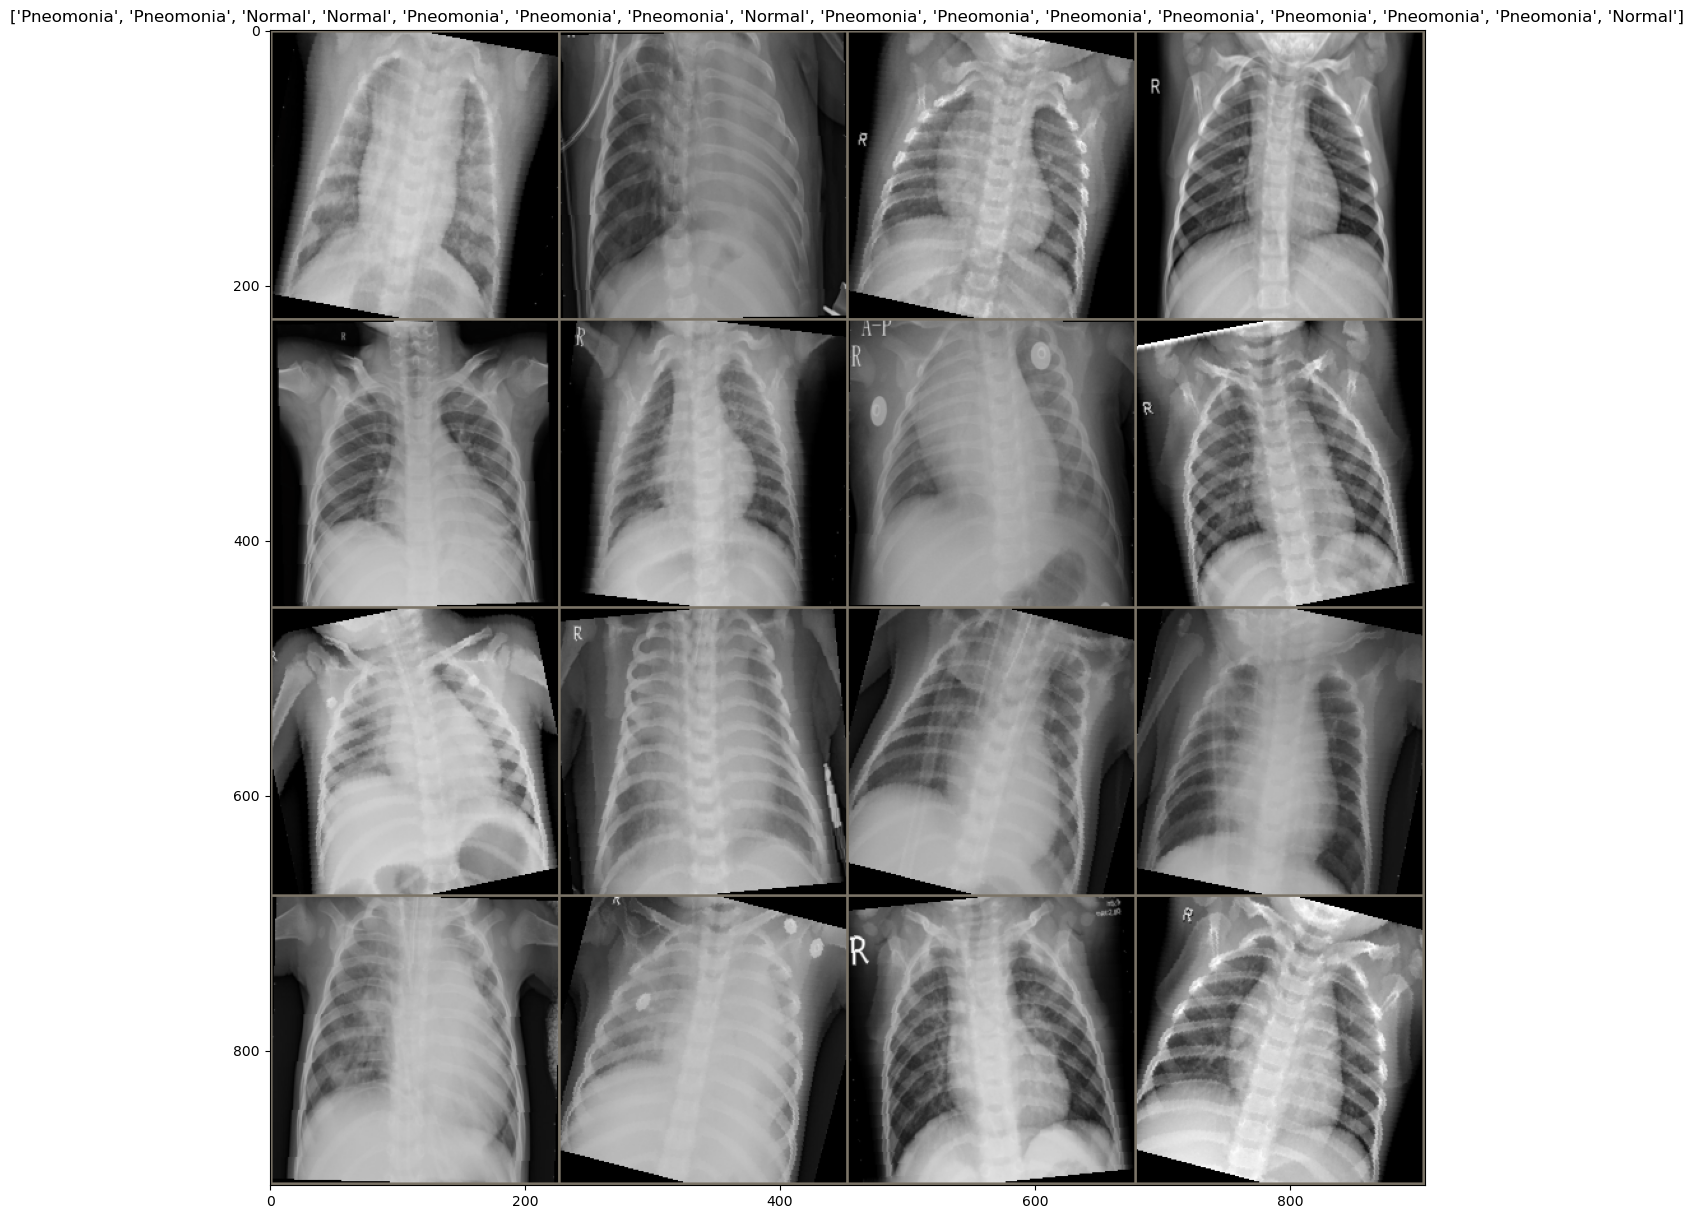

In [41]:
for images, labels in trainloader:
    out = make_grid(images, nrow=4)
    show_grid(out, title=[class_name[x] for x in labels])
    break  # Display only the first batch; remove this line if you want to visualize all batches


# Fine Tuning EfficientNet Model 

In [ ]:
from torch import nn 
import torch.nn.functional as F
import timm 



In [ ]:
from torchsummary import summary 



# Build a Simple Trainer

In [ ]:
from helper import accuracy

In [ ]:
class PneumoniaTrainer():
    
    def __init__(self):
        pass
    
    def train_batch_loop(self):
        pass

    
    def valid_batch_loop(self):
        pass
            
        
    def fit(self):
        pass

# Training Model 


Trained on google colab : https://colab.research.google.com/drive/1C5nNPj7OLYMGnNvWBU5W2zSXfgWDdXCo?usp=sharing

# Plot Results 

In [ ]:
from helper import view_classify




print("Test Loss : {}".format(avg_test_acc))
print("Test Acc : {}".format(avg_test_loss))

In [ ]:
image,label = testset[3]

ps = model(image.unsqueeze(0))
ps = F.softmax(ps,dim = 1)

view_classify(image,ps,label)